<a href="https://colab.research.google.com/github/Sanpie34/SQL-Job-Posting-Analysis/blob/main/SQL_Query_Results_Vizualitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#1. Top Paying Jobs

In [2]:
top_paying_jobs_DA = pd.read_csv('1_top_paying_jobs_DA.csv')
top_paying_jobs_DS = pd.read_json('1_top_paying_jobs_DS.json')

In [3]:
top_paying_jobs_DA[['job_title', 'salary_year_avg']]

,job_title,salary_year_avg
0,Data Analyst,650000.0
1,Director of Analytics,336500.0
2,Associate Director- Data Insights,255829.5
3,"Data Analyst, Marketing",232423.0
4,Data Analyst (Hybrid/Remote),217000.0
5,Principal Data Analyst (Remote),205000.0
6,"Director, Data Analyst - HYBRID",189309.0
7,"Principal Data Analyst, AV Performance Analysis",189000.0
8,Principal Data Analyst,186000.0
9,ERM Data Analyst,184000.0


In [4]:
top_paying_jobs_DS[['job_title', 'salary_year_avg']]

,job_title,salary_year_avg
0,Staff Data Scientist/Quant Researcher,550000
1,Staff Data Scientist - Business Analytics,525000
2,Data Scientist,375000
3,Head of Data Science,351500
4,Head of Data Science,324000
5,Director Level - Product Management - Data Sci...,320000
6,Director of Data Science & Analytics,313000
7,Head of Battery Data Science,300000
8,Principal Data Scientist,300000
9,Distinguished Data Scientist,300000


In [5]:
index_to_rename = 4 # Please specify the index of the row you want to modify
new_job_title = 'Head of Data Science (2)' # Please specify the new job title

# Using .loc to rename the value in the 'job_title' column at a specific index
top_paying_jobs_DS.loc[index_to_rename, 'job_title'] = new_job_title

# Display the updated DataFrame to verify the change
display(top_paying_jobs_DS)

,job_id,job_title,job_location,job_schedule_type,salary_year_avg,job_posted_date,company_name
0,40145,Staff Data Scientist/Quant Researcher,Anywhere,Full-time,550000,2023-08-16 16:05:16,Selby Jennings
1,1714768,Staff Data Scientist - Business Analytics,Anywhere,Full-time,525000,2023-09-01 19:24:02,Selby Jennings
2,1131472,Data Scientist,Anywhere,Full-time,375000,2023-07-31 14:05:21,Algo Capital Group
3,1742633,Head of Data Science,Anywhere,Full-time,351500,2023-07-12 03:07:31,Demandbase
4,551497,Head of Data Science (2),Anywhere,Full-time,324000,2023-05-26 22:04:44,Demandbase
5,126218,Director Level - Product Management - Data Sci...,Anywhere,Full-time,320000,2023-03-26 23:46:39,Teramind
6,1161630,Director of Data Science & Analytics,Anywhere,Full-time,313000,2023-08-23 22:03:48,Reddit
7,457991,Head of Battery Data Science,Anywhere,Full-time,300000,2023-10-02 16:40:07,Lawrence Harvey
8,38905,Principal Data Scientist,Anywhere,Full-time,300000,2023-11-24 14:08:44,Storm5
9,226011,Distinguished Data Scientist,Anywhere,Full-time,300000,2023-08-06 11:00:43,Walmart


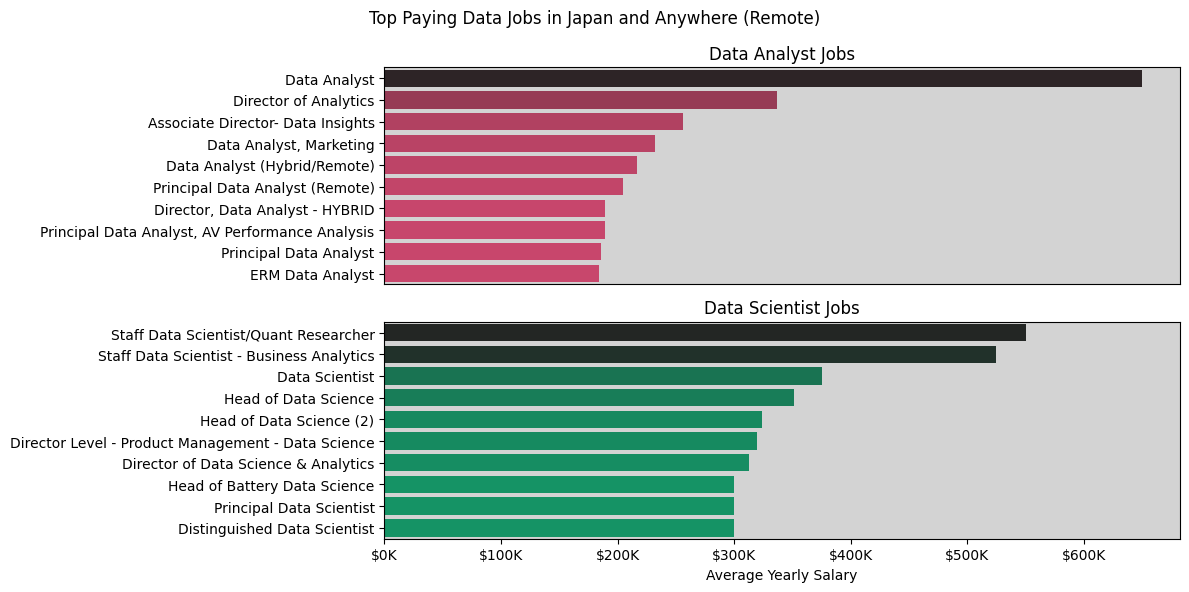

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].set_facecolor('lightgray') # Set subplot 0 background color
ax[1].set_facecolor('lightgray') # Set subplot 1 background color

sns.barplot(data = top_paying_jobs_DA, x = 'salary_year_avg', y = 'job_title', ax = ax[0], hue = 'salary_year_avg', palette = 'dark:#DE3163_r', legend = False)
ax[0].set_title('Data Analyst Jobs')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('')

sns.barplot(data = top_paying_jobs_DS, x = 'salary_year_avg', y = 'job_title', ax = ax[1], hue = 'salary_year_avg', palette = 'dark:#00A86B_r', legend = False)
ax[1].set_title('Data Scientist Jobs')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Average Yearly Salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))
plt.suptitle("Top Paying Data Jobs in Japan and Anywhere (Remote)")
plt.tight_layout()
plt.show()

# 2. Top Paying Job Skills

In [7]:
top_paying_job_skills_DA = pd.read_csv('2_top_paying_job_skills_DA.csv')
top_paying_job_skills_DS = pd.read_json('2_top_paying_job_skills_DS.json')

In [8]:
top_paying_job_skills_DA['skills'].value_counts().sort_values(ascending = False).head(10).to_frame()

,count
skills,
sql,8
python,7
tableau,6
r,4
excel,3
pandas,3
snowflake,3
azure,2
power bi,2


In [9]:
top_paying_job_skills_DS['skills'].value_counts().sort_values(ascending = False).head(10).to_frame()

,count
skills,
sql,4
python,4
java,3
spark,2
tensorflow,2
pytorch,2
aws,2
cassandra,1
azure,1


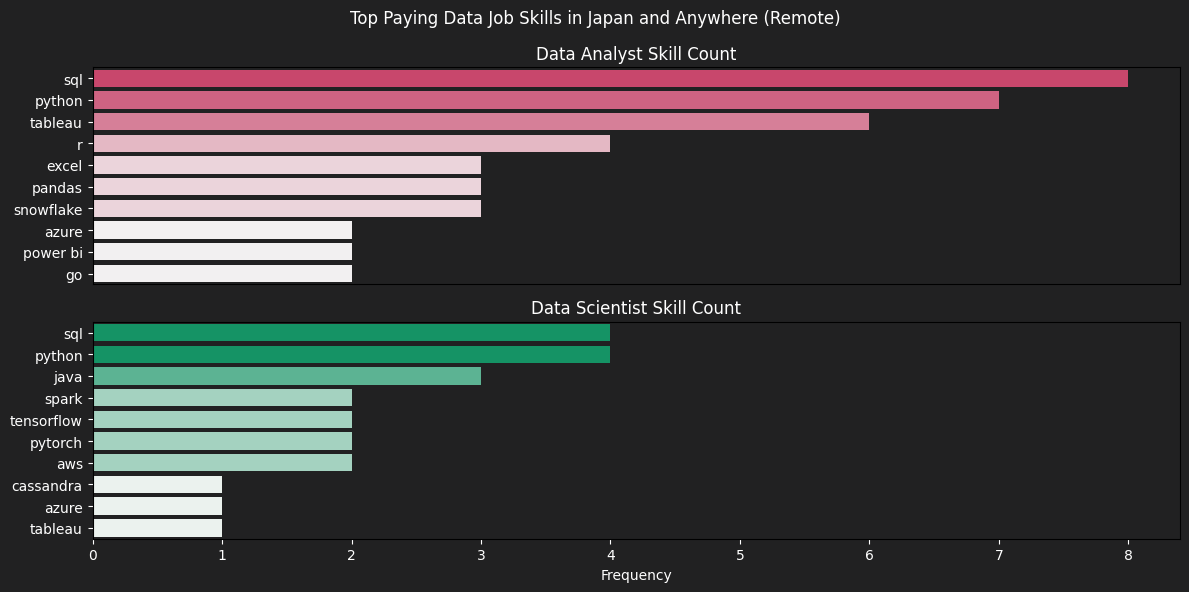

In [10]:
skill_count_DA = top_paying_job_skills_DA['skills'].value_counts().head(10).to_frame()
skill_count_DS = top_paying_job_skills_DS['skills'].value_counts().head(10).to_frame()

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
fig.set_facecolor('#212122')
ax[0].set_facecolor('#212122')
ax[1].set_facecolor('#212122')

sns.barplot(data = skill_count_DA, x = 'count', y = 'skills', ax = ax[0], hue = 'count', palette = 'light:#DE3163', legend = False)
ax[0].set_title('Data Analyst Skill Count', color='white')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('')
ax[0].tick_params(axis='y', colors='white') # Set y-axis tick color

sns.barplot(data = skill_count_DS, x = 'count', y = 'skills', ax = ax[1], hue = 'count', palette = 'light:#00A86B', legend = False)
ax[1].set_title('Data Scientist Skill Count', color='white')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Frequency', color='white')
ax[1].set_ylabel('')
ax[1].tick_params(axis='y', colors='white') # Set y-axis tick color
ax[1].tick_params(axis='x', colors='white') # Set x-axis tick color

plt.suptitle("Skills of Top Paying Data Job in Japan and Anywhere (Remote)", color='white')
plt.tight_layout()
plt.show()

3. Top Demanded Skills

In [11]:
top_demanded_skills_DA = pd.read_csv('3_top_demanded_skills_DA.csv')
top_demanded_skills_DS = pd.read_json('3_top_demanded_skills_DS.json')

In [12]:
top_demanded_skills_DA

,skills,demand_count
0,sql,7346
1,excel,4638
2,python,4375
3,tableau,3772
4,power bi,2623
5,r,2163
6,sas,1878
7,looker,872
8,azure,827
9,powerpoint,823


In [13]:
top_demanded_skills_DS

,skills,demand_count
0,python,10443
1,sql,7520
2,r,4700
3,aws,2615
4,tableau,2465
5,sas,2220
6,spark,2021
7,azure,1928
8,pandas,1843
9,tensorflow,1840


In [16]:
demanded_DA_total = top_demanded_skills_DA['demand_count'].sum()
demanded_DS_total = top_demanded_skills_DS['demand_count'].sum()

top_demanded_skills_DA['skills_percent'] = (top_demanded_skills_DA['demand_count'] / demanded_DA_total) * 100
top_demanded_skills_DS['skills_percent'] = (top_demanded_skills_DS['demand_count'] / demanded_DS_total) * 100


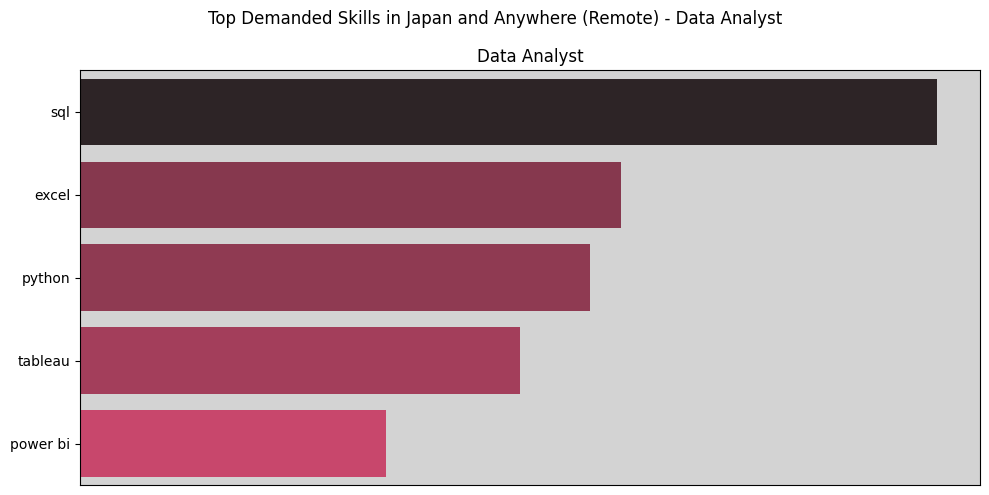

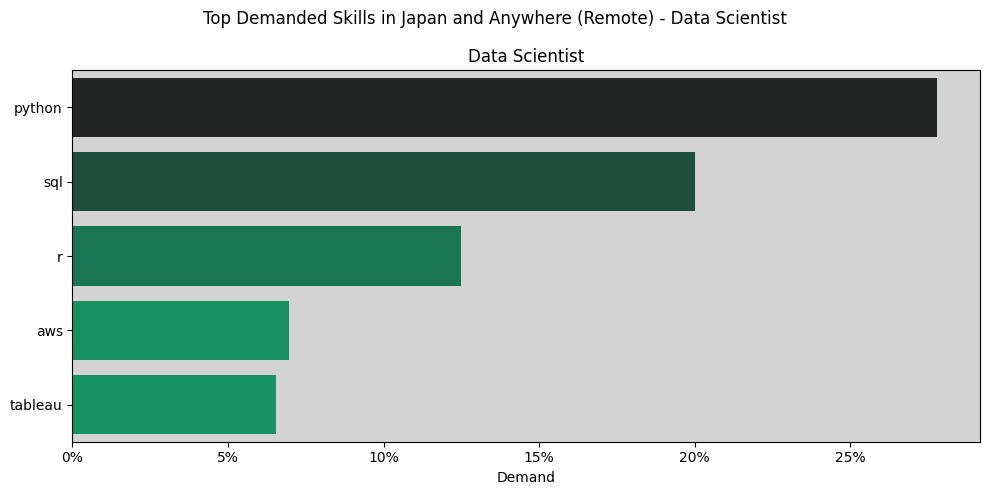

In [28]:
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_facecolor('lightgray')

sns.barplot(data = top_demanded_skills_DA.head(5), x = 'skills_percent', y = 'skills', hue = 'skills_percent', palette = 'dark:#DE3163_r', legend = False, ax=ax1)
ax1.set_title('Data Analyst')
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('')

plt.suptitle("Top Demanded Skills in Japan and Anywhere (Remote) - Data Analyst")
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.set_facecolor('lightgray')

sns.barplot(data = top_demanded_skills_DS.head(5), x = 'skills_percent', y = 'skills', hue = 'skills_percent', palette = 'dark:#00A86B_r', legend = False, ax=ax2)
ax2.set_title('Data Scientist')
ax2.set_xlabel('Demand')
ax2.set_ylabel('')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x)}%"))

plt.suptitle("Top Demanded Skills in Japan and Anywhere (Remote) - Data Scientist")
plt.tight_layout()
plt.show()

# 4. Top Paying Skills

In [29]:
top_paying_skills_DA = pd.read_csv('4_top_paying_skills_DA.csv')
top_paying_skills_DS = pd.read_json('4_top_paying_skills_DS.json')

In [30]:
top_paying_skills_DA

,skills,avg_salary
0,svn,400000
1,solidity,179000
2,couchbase,160515
3,datarobot,155486
4,golang,155000
5,mxnet,149000
6,dplyr,147633
7,vmware,147500
8,terraform,146734
9,twilio,138500


In [31]:
top_paying_skills_DS

,skills,avg_salary
0,asana,215477
1,airtable,201143
2,redhat,189500
3,watson,187417
4,elixir,170824
5,lua,170500
6,slack,168219
7,solidity,166980
8,ruby on rails,166500
9,rshiny,166436


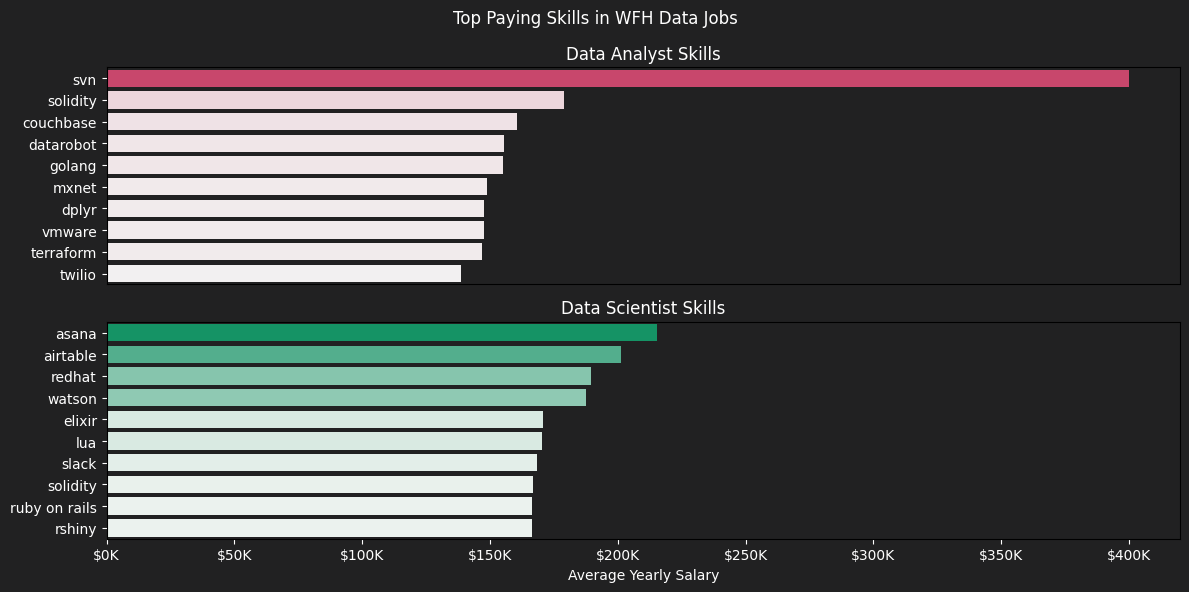

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
fig.set_facecolor('#212122')
ax[0].set_facecolor('#212122')
ax[1].set_facecolor('#212122')

sns.barplot(data = top_paying_skills_DA, x = 'avg_salary', y = 'skills', ax = ax[0], hue = 'avg_salary', palette = 'light:#DE3163', legend = False)
ax[0].set_title('Data Analyst Skills', color = 'white')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylabel('')
ax[0].tick_params(axis='y', colors='white')

sns.barplot(data = top_paying_skills_DS, x = 'avg_salary', y = 'skills', ax = ax[1], hue = 'avg_salary', palette = 'light:#00A86B', legend = False)
ax[1].set_title('Data Scientist Skills', color = 'white')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Average Yearly Salary', color = 'white')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))
ax[1].tick_params(axis='y', colors='white')
ax[1].tick_params(axis='x', colors='white')

plt.suptitle("Top Paying Skills in WFH Data Jobs", color = 'white')
plt.tight_layout()
plt.show()

# 5. Most Optimal Skills

In [37]:
optimal_skills_DA = pd.read_csv('5_optimal_skills_DA.csv')
optimal_skills_DS = pd.read_json('5_optimal_skills_DS.json')

In [38]:
optimal_skills_DA

,skill_id,skills,demand_count,salary_avg
0,0,sql,398,97237
1,181,excel,256,87288
2,1,python,236,101397
3,182,tableau,230,99288
4,5,r,148,100499
5,183,power bi,110,97431
6,7,sas,63,98902
7,186,sas,63,98902
8,196,powerpoint,58,88701
9,185,looker,49,103795


<Figure size 640x480 with 0 Axes>

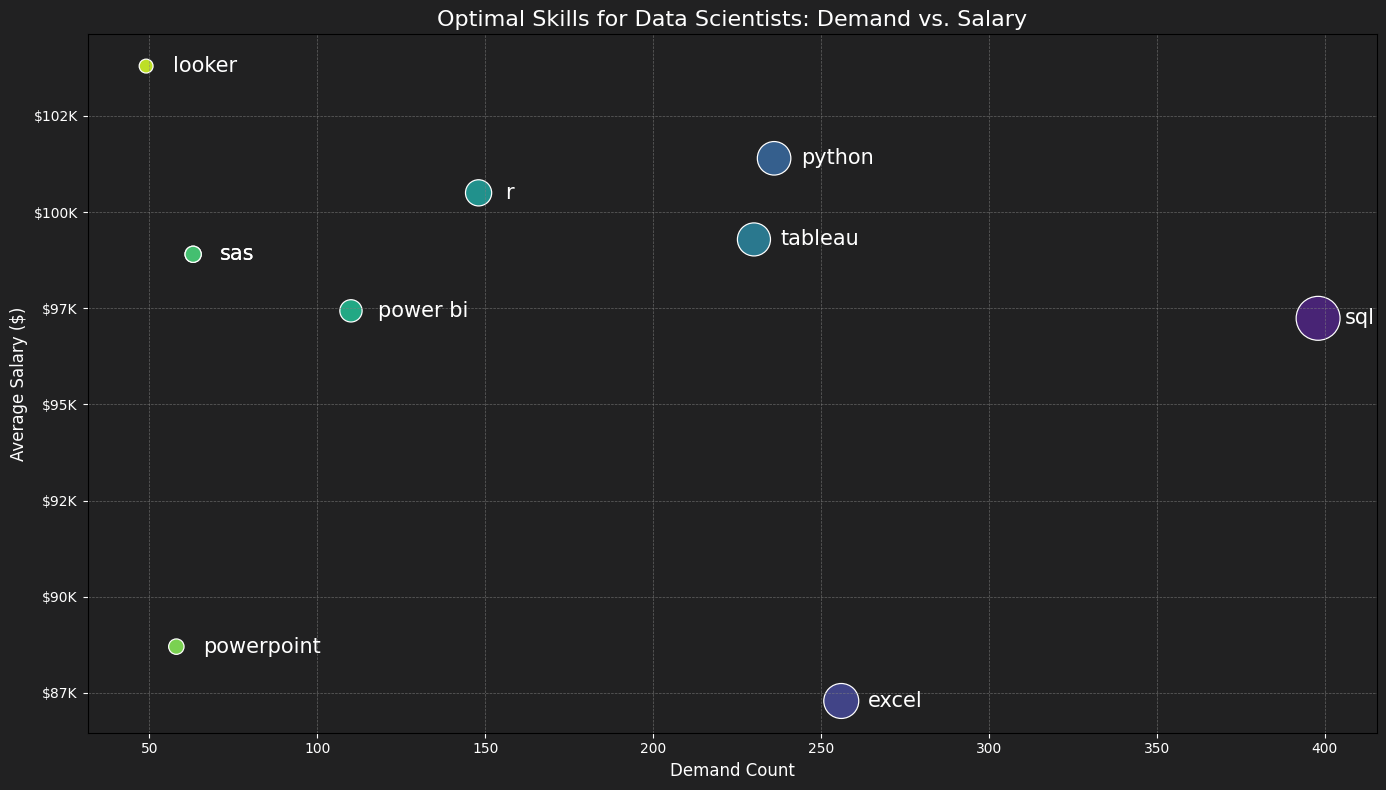

In [57]:

sns.despine()

fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('#212122')
ax.set_facecolor('#212122')

sns.scatterplot(data=optimal_skills_DA, x='demand_count', y='salary_avg', hue='skills', size='demand_count', sizes=(100, 1000), palette='viridis', legend=False, ax=ax)

for i, row in optimal_skills_DA.iterrows():
    ax.text(row['demand_count'] + 8, row['salary_avg'], row['skills'],
            color='white', fontsize=15, ha='left', va='center')

ax.set_title('Optimal Skills for Data Scientists: Demand vs. Salary', color='white', fontsize=16)
ax.set_xlabel('Demand Count', color='white', fontsize=12)
ax.set_ylabel('Average Salary ($)', color='white', fontsize=12)
ax.tick_params(axis='y', colors='white', labelsize=10)
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))

ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [39]:
optimal_skills_DS

,skill_id,skills,demand_count,salary_avg
0,1,python,763,143828
1,0,sql,591,142833
2,5,r,394,137885
3,182,tableau,219,146970
4,76,aws,217,149630
5,92,spark,149,150188
6,99,tensorflow,126,151536
7,74,azure,122,142306
8,101,pytorch,115,152603
9,93,pandas,113,144816


<Figure size 640x480 with 0 Axes>

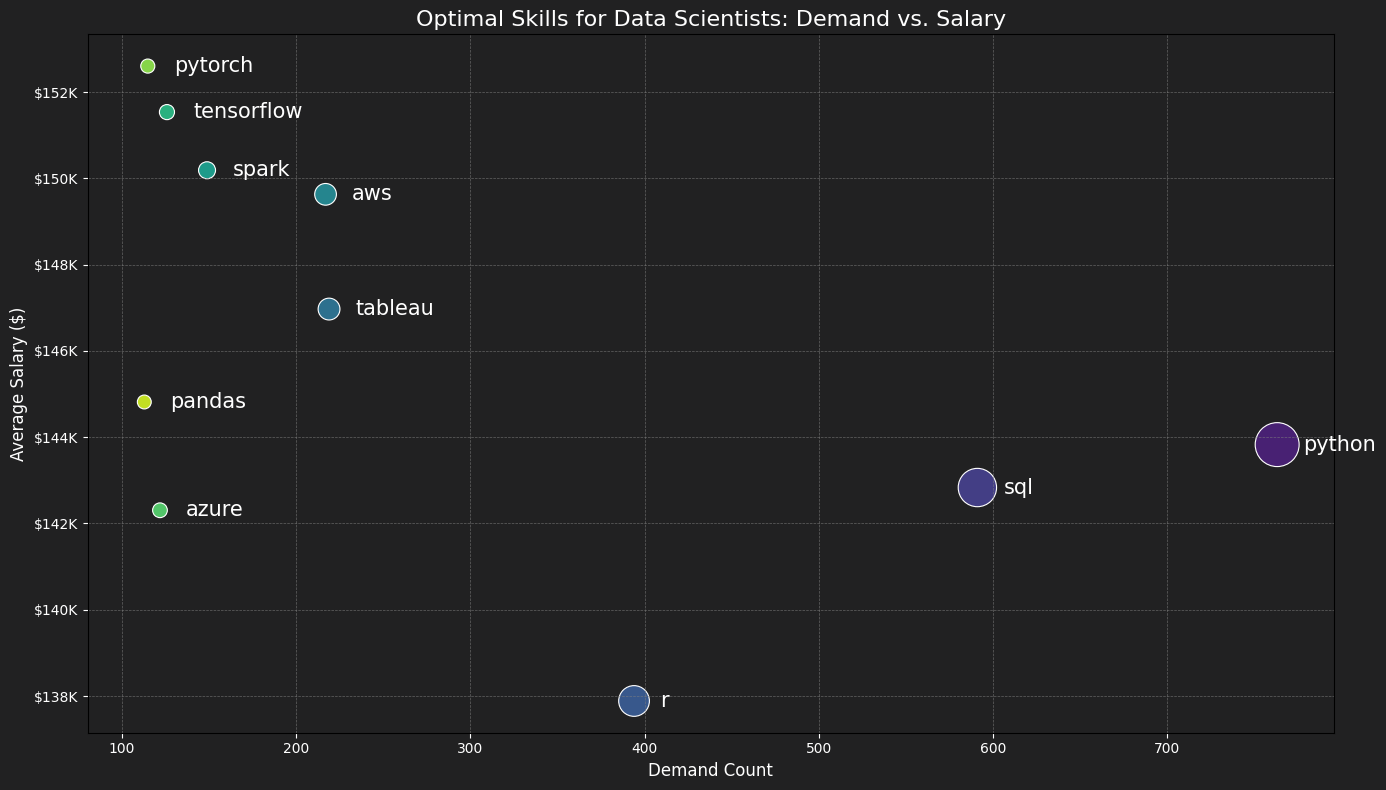

In [54]:

sns.despine()

fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('#212122')
ax.set_facecolor('#212122')

sns.scatterplot(data=optimal_skills_DS, x='demand_count', y='salary_avg', hue='skills', size='demand_count', sizes=(100, 1000), palette='viridis', legend=False, ax=ax)

for i, row in optimal_skills_DS.iterrows():
    ax.text(row['demand_count'] + 15, row['salary_avg'], row['skills'],
            color='white', fontsize=15, ha='left', va='center')

ax.set_title('Optimal Skills for Data Scientists: Demand vs. Salary', color='white', fontsize=16)
ax.set_xlabel('Demand Count', color='white', fontsize=12)
ax.set_ylabel('Average Salary ($)', color='white', fontsize=12)
ax.tick_params(axis='y', colors='white', labelsize=10)
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x/1000)}K"))

ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()